## 財報狗

In [4]:
import requests
headers = {
'X-Requested-With':'XMLHttpRequest',
'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'    
    
}
res = requests.get('https://statementdog.com/analysis/analysis_ajax/2330/2011/1/2016/4/1?queried_by_user=false&_=1477013988030', headers = headers)
#print(res.text)

## 抓取公開資訊觀測站資料

In [9]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
'encodeURIComponent':'1',
'step'   :'1',
'firstin':'1',
'TYPEK'  :'sii',
'code'   :'01',
'year'   :'105',
'season' :'01'
}
res = requests.post(url, data=payload)
res.encoding = 'utf-8'
#print(res.text)

<table>
    <tr> <th> col1 </th>   <th>  col2</th> </tr>
    <tr> <td> A    </td>   <td>  1   </td> </tr>
    <tr> <td> B    </td>   <td>  2   </td> </tr>
</table>

In [11]:
# 透過Pands 讀取網頁資料
import pandas
dfs = pandas.read_html(res.text)

In [14]:
#取得 Data Frames 中的第一個Data Frame
stockdf = dfs[0]

In [17]:
# 欄位名稱
stockdf.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [16]:
#抓取第 0列
stockdf.iloc[0]

0         公司代號
1         公司名稱
2          產業別
3    基本每股盈餘(元)
4      普通股每股面額
5         營業收入
6         營業利益
7     營業外收入及支出
8         稅後淨利
Name: 0, dtype: object

In [18]:
# 欄位名稱設為第一列
stockdf.columns = stockdf.iloc[0]

In [22]:
# 抽取代號為數字的
stockdf['公司代號'].str.match('^\d+')

0     False
1      True
2      True
3      True
4      True
5      True
6     False
7      True
8      True
9     False
10    False
Name: 公司代號, dtype: bool

In [24]:
# 將所有公司的財報取出來
cement_industry = stockdf[stockdf['公司代號'].str.match('^\d+')]

In [26]:
# 列出水泥工業前五列
cement_industry.head()

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
1,1104,環球水泥股份有限公司,水泥工業,0.55,新台幣 10.0000元,1105803,31658,311221,342983
2,1108,幸福水泥股份有限公司,水泥工業,0.26,新台幣 10.0000元,995636,133019,-6225,104371
3,1110,東南水泥股份有限公司,水泥工業,0.21,新台幣 10.0000元,383670,15784,181488,216613
4,1101,台灣水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,17724112,483889,-206042,94527
5,1102,亞洲水泥股份有限公司,水泥工業,0.06,新台幣 10.0000元,13038960,406252,-123702,194459


In [25]:
# 將資料寫進Excel
cement_industry.to_excel('cement.xlsx')

## 整理完整EPS資訊

In [28]:
import requests
import pandas

# 建立一EPS 函式
def getEPS(year, season):
    url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
    payload = {
    'encodeURIComponent':'1',
    'step'   :'1',
    'firstin':'1',
    'TYPEK'  :'sii',
    'code'   :'01',
    'year'   : year,
    'season' : season
    }
    res = requests.post(url, data=payload)
    res.encoding = 'utf-8'

    dfs     = pandas.read_html(res.text)
    stockdf = dfs[0]
    
    # 欄位名稱設為第一列
    stockdf.columns = stockdf.iloc[0]

    stockdf = stockdf[stockdf['公司代號'].str.match('^\d+')]
    stockdf['year']   = year
    stockdf['season'] = season
    return stockdf
    

In [ ]:
dfall = []

# 根據民國年與季抓取資料
seasons = ['01', '02', '03', '04']
for year in range(102, 105):
    for season in seasons:
        # 將每一次抓取到的EPS 塞入一個List 之中
        dfall.append(getEPS(year, season))

In [32]:
# 使用concat 合併所有EPS 資訊
epsdf = pandas.concat(dfall)
epsdf.head()


,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利,year,season
1,1102,亞洲水泥股份有限公司,水泥工業,0.40,新台幣 10.0000元,13931550,339801,1250044,1371559,102,01
2,1101,台灣水泥股份有限公司,水泥工業,0.38,新台幣 10.0000元,24114047,2026729,314060,1999624,102,01
3,1104,環球水泥股份有限公司,水泥工業,0.30,新台幣 10.0000元,1248072,30247,156012,183441,102,01
4,1108,幸福水泥股份有限公司,水泥工業,0.17,新台幣 10.0000元,1203671,98223,-13612,63869,102,01
5,1103,嘉新水泥股份有限公司,水泥工業,0.13,新台幣 10.0000元,741189,-149811,183613,59637,102,01


## 抓取591 屋主資訊

In [33]:
import requests
import shutil
picurl = 'https://statics.591.com.tw/tools/showPhone.php?info_data=%2B%2BFQN75KrrlhHO%2Bri2nT%2BhxZOaY&type=rLEFMu4XrrpgEw'
# 讀取資料 by chunk
res = requests.get(picurl, stream=True)
# 使用wb 寫入
with open('phone.png', 'wb') as f:
    # 將讀回來的物件copy 到 檔案中
    shutil.copyfileobj(res.raw, f)

In [1]:
# 將圖片show 在畫面上
from PIL import Image
Image.open('phone.png')

# 安裝OCR 工具
1. pip install pytessaract (在Anaconda Prompt 黑黑的畫面裡)
2. 到tesseract 的網站下載tessract ocr
-  https://sourceforge.net/projects/tesseract-ocr-alt/files/latest/download?source=files
3. 安裝下載檔案
4. 重新啟動jupyter notebook

In [7]:
# 使用Pytesseract 將圖片變文字
import pytesseract
phone = pytesseract.image_to_string(Image.open('phone.png'))

In [8]:
# 產生電話號碼
phone_split  = phone.split('- ')
''.join(phone_split)

'0955284831'

In [47]:
import requests
from bs4 import BeautifulSoup
import shutil
rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'html.parser')

payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2330',
#'CaptchaControl1':'DCPZJ',
'btnOK':'查詢',    
}

for inp in soup.select('input[type==hidden]'):
    payload[inp['name']] = inp['value']

In [48]:
domain = 'http://bsr.twse.com.tw/bshtm/'
res2 = rs.get(domain + soup.select('img')[1]['src'], stream=True)

with open('Captcha.png', 'wb') as f:
    shutil.copyfileobj(res2.raw, f)

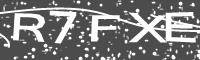

In [42]:
# 將圖片show 在畫面上
from PIL import Image
Image.open('Captcha.png')

In [43]:
#payload['CaptchaControl1'] = 'R7FXE'

In [49]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data= payload)

In [50]:
rs4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t')
print(rs4.text)



<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>

</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><link id="ssLayout" rel="stylesheet" type="text/css" href="./BSR_Style.css" /></head>
<body bottommargin="0" leftmargin="0" topmargin="0" rightmargin="0">
    <form method="post" action="bsContent.aspx?v=t" id="form1">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="/wEPDwUKLTgxNDI2MzM4MGRkOCeVH5iuNhKRRTu7K+3m5A==" />

        <span id="sp_HtmlCode"><html><head></head><body><table border=0 cellpadding=0 cellspacing=0><tr><td align =center>  <table border='0' cellpadding='0' cellspacing='0' width='600px'>     <tr><td align='center'>       <table cellpadding='2' cellspacing='0' border='1' bordercolordark='#FFFFFF' bordercolorlight='#363636' bgcolor='#FFFFFF' width='100%'> 
    <tr>  
     <td class='column_title'> 
          交易日期</td> 
       <td colspan='3' class='column_value' id='receive_date'> 
    2016/10/20</td> 
       <td class=